# Working with time series data

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_rows = 8

## Case study: air quality data of European monitoring stations (AirBase)

[AirBase](http://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-8#tab-data-by-country) (The European Air quality dataBase): hourly measurements of all air quality monitoring stations from Europe. 

I downloaded and preprocessed some of the data ([python-airbase](https://github.com/jorisvandenbossche/python-airbase)): `data/airbase_data.csv`. This file includes the hourly concentrations of NO2 for 4 different measurement stations:

- FR04037 (PARIS 13eme): urban background site at Square de Choisy
- FR04012 (Paris, Place Victor Basch): urban traffic site at Rue d'Alesia
- BETR802: urban traffic site in Antwerp, Belgium
- BETN029: rural background site in Houtem, Belgium

See http://www.eea.europa.eu/themes/air/interactive/no2

## Importing the data

Import the csv file:

In [2]:
!head -5 data/airbase_data.csv

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,-9999,16.0,-9999,-9999
1998-01-01 01:00:00,-9999,13.0,-9999,-9999
1998-01-01 02:00:00,-9999,12.0,-9999,-9999
1998-01-01 03:00:00,-9999,12.0,-9999,-9999


As you can see, the missing values are indicated by `-9999`. This can be recognized by `read_csv` by passing the `na_values` keyword:

In [3]:
data = pd.read_csv('data/airbase_data.csv', index_col=0, parse_dates=True, na_values=[-9999])

## Exploring the data

In [4]:
data.head(3)

,BETR801,BETN029,FR04037,FR04012
1998-01-01 00:00:00,NaN,16,NaN,NaN
1998-01-01 01:00:00,NaN,13,NaN,NaN
1998-01-01 02:00:00,NaN,12,NaN,NaN


In [5]:
data.tail()

,BETR801,BETN029,FR04037,FR04012
2012-12-31 19:00:00,21.0,2.5,28,67
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


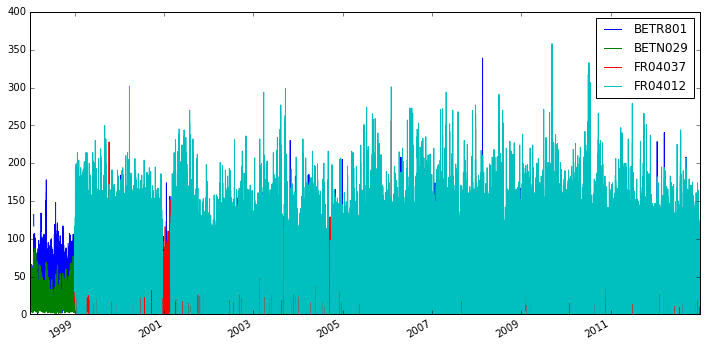

In [6]:
data.plot(figsize=(12,6))

This does not say too much ..

We can select part of the data (eg the latest 500 data points):

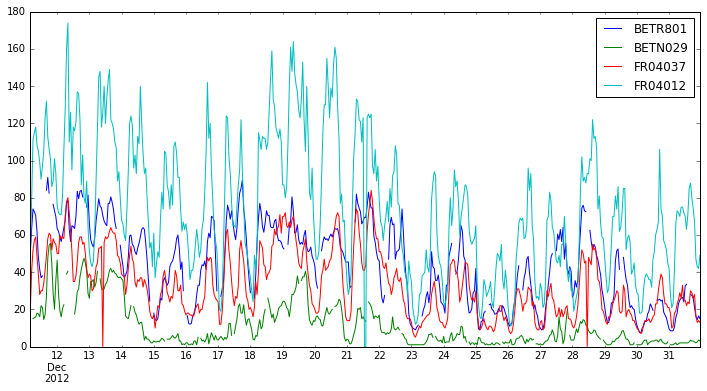

In [7]:
data[-500:].plot(figsize=(12,6))

Or we can use some more advanced time series features -> next section!

## Working with time series data

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [8]:
data.index

DatetimeIndex(['1998-01-01 00:00:00', '1998-01-01 01:00:00',
               '1998-01-01 02:00:00', '1998-01-01 03:00:00',
               '1998-01-01 04:00:00', '1998-01-01 05:00:00',
               '1998-01-01 06:00:00', '1998-01-01 07:00:00',
               '1998-01-01 08:00:00', '1998-01-01 09:00:00',
               ...
               '2012-12-31 14:00:00', '2012-12-31 15:00:00',
               '2012-12-31 16:00:00', '2012-12-31 17:00:00',
               '2012-12-31 18:00:00', '2012-12-31 19:00:00',
               '2012-12-31 20:00:00', '2012-12-31 21:00:00',
               '2012-12-31 22:00:00', '2012-12-31 23:00:00'],
              dtype='datetime64[ns]', length=131265, freq=None)

Indexing a time series works with strings:

In [9]:
data["2010-01-01 09:00": "2010-01-01 12:00"]

,BETR801,BETN029,FR04037,FR04012
2010-01-01 09:00:00,17,7,19,41
2010-01-01 10:00:00,18,5,21,48
2010-01-01 11:00:00,17,4,23,63
2010-01-01 12:00:00,18,4,22,57


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [10]:
data['2012']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21.0,1.0,17,56
2012-01-01 01:00:00,18.0,1.0,16,50
2012-01-01 02:00:00,20.0,1.0,14,46
2012-01-01 03:00:00,16.0,1.0,17,47
...,...,...,...,...
2012-12-31 20:00:00,16.5,2.0,16,47
2012-12-31 21:00:00,14.5,2.5,13,43
2012-12-31 22:00:00,16.5,3.5,14,42
2012-12-31 23:00:00,15.0,3.0,13,49


Normally you would expect this to access a column named '2012', but as for a DatetimeIndex, pandas also tries to interpret it as a datetime slice.

Or all data of January up to March 2012:

In [11]:
data['2012-01':'2012-03']

,BETR801,BETN029,FR04037,FR04012
2012-01-01 00:00:00,21,1,17,56
2012-01-01 01:00:00,18,1,16,50
2012-01-01 02:00:00,20,1,14,46
2012-01-01 03:00:00,16,1,17,47
...,...,...,...,...
2012-03-31 20:00:00,38,6,19,46
2012-03-31 21:00:00,36,8,17,56
2012-03-31 22:00:00,34,8,18,59
2012-03-31 23:00:00,38,8,24,54


Time and date components can be accessed from the index:

In [12]:
data.index.hour

array([ 0,  1,  2, ..., 21, 22, 23], dtype=int32)

In [13]:
data.index.year

array([1998, 1998, 1998, ..., 2012, 2012, 2012], dtype=int32)

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data starting from 1999
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January for all different years
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: select all data in January, February and March for all different years (use `isin` method)
</div>

<div class="alert alert-success">
    <b>EXERCISE</b>: select all 'daytime' data (between 8h and 20h) for all days
</div>

In [17]:
data[(data.index.hour >= 8) & (data.index.hour < 20)]

,BETR801,BETN029,FR04037,FR04012
1999-01-01 08:00:00,28.0,20.0,65,70
1999-01-01 09:00:00,29.0,17.0,66,70
1999-01-01 10:00:00,36.0,15.0,58,79
1999-01-01 11:00:00,35.0,15.0,42,68
...,...,...,...,...
2012-12-31 16:00:00,28.0,3.5,30,88
2012-12-31 17:00:00,27.5,3.0,29,80
2012-12-31 18:00:00,26.0,3.0,26,74
2012-12-31 19:00:00,21.0,2.5,28,67


In [18]:
data.between_time('08:00', '20:00')

,BETR801,BETN029,FR04037,FR04012
1999-01-01 08:00:00,28.0,20.0,65,70
1999-01-01 09:00:00,29.0,17.0,66,70
1999-01-01 10:00:00,36.0,15.0,58,79
1999-01-01 11:00:00,35.0,15.0,42,68
...,...,...,...,...
2012-12-31 17:00:00,27.5,3.0,29,80
2012-12-31 18:00:00,26.0,3.0,26,74
2012-12-31 19:00:00,21.0,2.5,28,67
2012-12-31 20:00:00,16.5,2.0,16,47


## The power of pandas: `resample`

A very powerful method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [19]:
data.resample('D').head()

,BETR801,BETN029,FR04037,FR04012
1999-01-01,35.500000,16.363636,65.166667,86.250000
1999-01-02,26.681818,7.727273,38.833333,66.916667
1999-01-03,19.636364,8.818182,34.166667,65.500000
1999-01-04,35.294118,4.772727,41.041667,67.541667
1999-01-05,54.250000,12.954545,59.291667,96.416667


By default, `resample` takes the mean as aggregation function, but other methods can also be specified:

In [20]:
data.resample('D', how='max').head()

,BETR801,BETN029,FR04037,FR04012
1999-01-01,48,21,85,116
1999-01-02,43,19,65,112
1999-01-03,31,24,67,128
1999-01-04,56,8,65,112
1999-01-05,70,34,75,198


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

Further exploring the data:

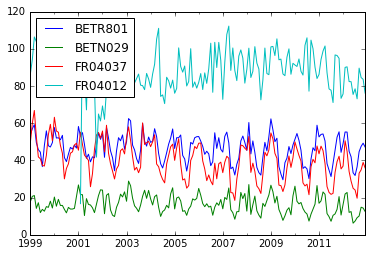

In [21]:
data.resample('M').plot() # 'A'

In [22]:
# data['2012'].resample('D').plot()

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mean and median concentration of the 'FR04037' station for the years 2009-2012
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: plot the monthly mininum and maximum daily concentration of the 'BETR801' station
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: make a bar plot of the mean of the stations in year of 2012
</div>

## Combination with groupby

`resample` can actually be seen as a specific kind of `groupby`. E.g. taking annual means with `data.resample('A', 'mean')` is equivalent to `data.groupby(data.index.year).mean()` (only the result of `resample` still has a `DatetimeIndex`).



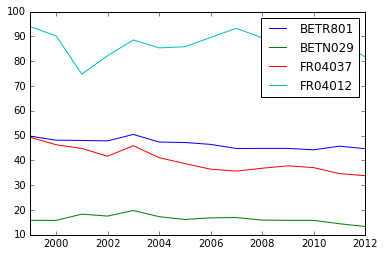

In [26]:
data.groupby(data.index.year).mean().plot()

But, `groupby` is more flexible and can also do resamples that do not result in a new continuous time series, e.g. by grouping by the hour of the day to get the diurnal cycle.

<div class="alert alert-success">
    <b>QUESTION</b>: how does the *typical monthly profile* (averaged over years) look like for the different stations? (*Hint*: First group the data on month index, then calculate and pot mean).
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: plot the 0.95 quantile of the concentration in 'BETR801' and 'BETN029' for all **weeks** of 2011 (*Hint*: use `quantile` aggregation function)
</div>


<div class="alert alert-success">
    <b>QUESTION</b>: The typical diurnal (24h) profile for the different stations?
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: What is the difference in the typical diurnal profile between week and weekend days for station FR04012? (*Hint* Start by adding a weekday column to the data frame, then use `isin` to select Monday to Friday and weekend days).
</div>

## Extra exercises 

If you are done, you can give a try to these exercises:

<div class="alert alert-success">
    <b>QUESTION</b>: What are the number of exceedances of hourly values above the European limit 200 µg/m3 ?
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: And are there exceedances of the yearly limit value of 40 µg/m3 since 200 ?
</div>

<div class="alert alert-success">
    <b>QUESTION</b>: Visualize the typical week profile for the different stations as boxplots.
</div>

Tip: the boxplot method of a DataFrame expects the data for the different boxes in different columns)

<div class="alert alert-success">
    <b>QUESTION</b>: Calculate the correlation between the different stations
</div>


## Acknowledgement

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>)*.

> *© 2015, modified by Bartosz Teleńczuk (original sources available from https://github.com/jorisvandenbossche/2015-EuroScipy-pandas-tutorial)*

> *Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---